<a href="https://colab.research.google.com/github/ashwantmanikoth/ML_WorkFlow/blob/main/Assignment2_Kaggle_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 ImageClassification Kaggle Model and dataset

# Cat vs Rabbit

Binary Image Classification Model Evaluation
Overview
This repository contains code for evaluating the performance of a binary image classification model. The model is designed to classify images as either "cat" or "rabbit."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install scikit-learn


Mounted at /content/drive


# 1- Dataset is downloaded to Google Drive
# Then the data set is extracted to folders

In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = "/content/drive/MyDrive/Teaching/TME_6015/Assignment_2/catvsrabbit.zip"

# Path where you want to extract the zip file
extract_path = "/content/drive/MyDrive/Teaching/TME_6015/Assignment_2/catvsrabbit"

# Create the extract folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Create a ZipFile Object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents of zip file in the extract folder
    zip_ref.extractall(extract_path)

# 2-Using Keras Library the Model **Resnetv2** is loaded

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2")
])
m.build([None, 224, 224, 3])  # Batch input shape.


# 3-The Images of Cats and Rabbits are taken from the respective folder and processed to be used for the model.

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cat_images=[]
cat_label=[]
rabbit_label=[]
rabbit_images=[]
target_size = (224, 224)

cat_image_dir = os.path.join(extract_path, "test-images/cat")

for filename in os.listdir(cat_image_dir):
  cat_image_path = os.path.join(cat_image_dir, filename)
  image = load_img(cat_image_path, target_size=target_size)

  image_array = img_to_array(image)

  image_array /= 255.0

  cat_images.append(image_array)
  cat_label.append(0)

image_dir = os.path.join(extract_path, "test-images/rabbit")
rabbit_labels=[]

for filename in os.listdir(image_dir):
  rabbit_image_path = os.path.join(image_dir, filename)

  image = load_img(rabbit_image_path, target_size=target_size)

  image_array = img_to_array(image)

  image_array /= 255.0
  rabbit_images.append(image_array)
  rabbit_labels.append(1)



# Confusion Matrix is generated to show the accuray of the tested image and the predicted output

1/1 [==============================] - 5s 5s/step
Confusion Matrix:
[[10  0]
 [ 0  5]]


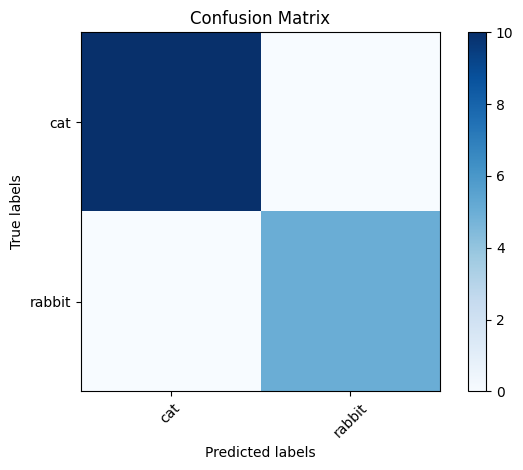

In [ ]:
test_cat_image = np.array(cat_images)
test_rabbit_image = np.array(rabbit_images)

test_cat_label =np.array(cat_label)
test_rabbit_label =np.array(rabbit_labels)


X_test=[]
X_test.append(test_cat_image)
X_test.append(test_cat_image)

X_test = np.concatenate([test_cat_image, test_rabbit_image], axis=0)
y_test = np.concatenate([test_cat_label, test_rabbit_label], axis=0)


# Make predictions on the test data
y_pred = m.predict(X_test)
y_pred= np.argmax(y_pred,axis=1)%2

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(cm)
class_names =['cat','rabbit']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()
# Show the confusion matrix plot
plt.show()

# **Conclusion**
#This code is designed to help you evaluate the performance of a binary image classification model on your cat and rabbit image data